In [308]:
import numpy as np
import gym
import gym_bandits
import matplotlib.pyplot as plt

In [391]:
env = gym.make("BanditTenArmedGaussian-v0")

In [396]:
env.reset()

0

In [392]:
numrounds = 1000000
count = np.zeros(10)
sum_revards = np.zeros(10)
Q = np.zeros(10)

In [393]:
revards = []
revard1 = []
totalrevard = 0

# Greedy Algorithm

In [313]:
def GreedyAlg():
    if(Q.sum() == 0):
        return env.action_space.sample()
    return np.argmax(Q)

In [314]:
for i in range(numrounds):
    arm = GreedyAlg()
    observation, revard,done,info = env.step(arm)
    count[arm] += 1
    sum_revards[arm] += revard
    totalrevard += revard
    if(i%1000==0):
        revard1.append(totalrevard/1000)
        totalrevard = 0
    Q[arm] = sum_revards[arm]/count[arm]
revards.append(revard1)
revard1 = []
print("the optimal arm is {}".format(np.argmax(Q)))

the optimal arm is 7


# Epsilon Greedy Algorithm

In [315]:
def epsilonGreedy(E = 0.001):
    rand = np.random.random()
    if(rand < E):
        action = env.action_space.sample()
    else:
        action = np.argmax(Q)
    return action

In [341]:
for i in range(numrounds):
    arm = epsilonGreedy(0.1)
    observation, revard,done,info = env.step(arm)
    count[arm] += 1
    sum_revards[arm] += revard
    totalrevard += revard
    if(i%1000==0):
        revard1.append(totalrevard/1000)
        totalrevard = 0
    Q[arm] = sum_revards[arm]/count[arm]
revards.append(revard1)
revard1 = []
print("the optimal arm is {}".format(np.argmax(Q)))

the optimal arm is 5


# softmax Greedy

In [317]:
def softmaxEpsilonGreedy(T=0.5):
    total = np.exp(Q/T).sum()
    probs = np.exp(Q/T)/total
    ran = np.random.random()
    accum = 0.0
    for i in range(len(probs)):
        accum += probs[i]
        if(accum > ran):
            return i
    return np.argmax(Q)

In [318]:
for i in range(numrounds):
    arm = softmaxEpsilonGreedy()
    observation, revard,done,info = env.step(arm)
    count[arm] += 1
    sum_revards[arm] += revard
    totalrevard += revard
    if(i%1000==0):
        revard1.append(totalrevard/1000)
        totalrevard = 0
    Q[arm] += sum_revards[arm]/count[arm]
revards.append(revard1)
revard1 = []
print("the optimal arm is {}".format(np.argmax(Q)))

C:\Users\edkar\AppData\Local\Temp\ipykernel_14944\2795699998.py:2: RuntimeWarning: overflow encountered in exp
  total = np.exp(Q/T).sum()
C:\Users\edkar\AppData\Local\Temp\ipykernel_14944\2795699998.py:3: RuntimeWarning: overflow encountered in exp
  probs = np.exp(Q/T)/total
C:\Users\edkar\AppData\Local\Temp\ipykernel_14944\2795699998.py:3: RuntimeWarning: invalid value encountered in true_divide
  probs = np.exp(Q/T)/total


the optimal arm is 5


# Greedy with upper bound

In [319]:
def GreeadyWithUpperBound(C, count, i):
    return np.argmax((Q+C*np.sqrt(np.log(i+1)/(count+np.ones(10)))))

In [320]:
for i in range(numrounds):
    arm = GreeadyWithUpperBound(2,count,i)
    observation, revard,done,info = env.step(arm)
    count[arm] += 1
    sum_revards[arm] += revard
    totalrevard += revard
    if(i%1000==0):
        revard1.append(totalrevard/1000)
        totalrevard = 0
    Q[arm] = sum_revards[arm]/count[arm]
revards.append(revard1)
revard1 = []
print("the optimal arm is {}".format(np.argmax(Q)))

the optimal arm is 5


In [327]:
indexes = np.arange(1,len(revards[0])+1)

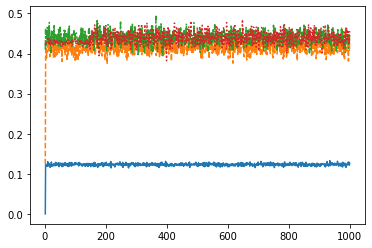

In [328]:
plt.plot(indexes,revards[0],'-',indexes,revards[1],'--', indexes,revards[2],'-.', indexes,revards[3],':')

# Gradient Algorithm

In [420]:
H = np.zeros(10)
for i in range(10):
    H[i] = 8
Q = np.zeros(10)
count = np.zeros(10)
totalrevard = 0
revard1 = []
sum_revards = np.zeros(10)
P = np.exp(H)/np.exp(H).sum()
alpha = 0.005

def GradientAlgorithm(H, E):
    rand = np.random.random()
    if(rand < E):
        action = env.action_space.sample()
    else:
        action = np.argmax(H)
    return action

In [421]:
for i in range(numrounds):
    arm = GradientAlgorithm(H, 0.1)
    observation, revard,done,info = env.step(arm)
    count[arm] += 1
    sum_revards[arm] += revard
    
    totalrevard += revard
    if(i%1000==0):
        revard1.append(totalrevard/1000)
        totalrevard = 0
    
    Q[arm] = sum_revards[arm]/count[arm]
    for j in range(10):
        if(j == arm):
            H[j] = H[j] + alpha*(revard - sum_revards.sum()/count.sum())*(1-P[j])
        else:
            H[j] = H[j] - alpha*(revard - sum_revards.sum()/count.sum())*P[j]
    P = np.exp(H)/np.exp(H).sum()
revards.append(revard1)
revard1 = []
print("the optimal arm is {}".format(np.argmax(Q)))

the optimal arm is 7


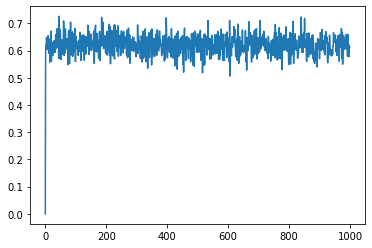

In [423]:
plt.plot(revards[5])

In [401]:
steps = []
for i in range(100):
    observation, revard,done,info = env.step(7)
    steps.append(revard)
np.array(steps).mean()

0.6866035165480424